In [73]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.2 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


Import objects and remove non-desired cells

In [74]:
adata_3GEX = sc.read('./multiome/data/3GEX_processed_cnv.h5ad')
adata_3GEX = adata_3GEX[adata_3GEX.obs['sample_type'].isin(['AC','NS'])]
adata_3GEX.uns['log1p']["base"] = None

In [75]:
adata_5GEX = sc.read('./5GEX/run2/data/5GEX_run2_processed.h5ad')
adata_5GEX = adata_5GEX[~adata_5GEX.obs['sample_type'].isin(['AC-2']),:]
adata_5GEX.uns['log1p']["base"] = None

In [76]:
adata_5GEX.obs['sample'].value_counts()

sample
S7    7025
S6    5605
C8    4641
S8    4030
C7    3951
S5    3402
Name: count, dtype: int64

In [77]:
adata_SS2 = sc.read('/home/laura.vicente/bruno/projects/genomics/laura.garcia/glioblastoma/analysis/SS2/data/SS2_processed.h5ad')
adata_SS2.uns['log1p']["base"] = None

In [78]:
adata_SS2.obs['sample'].value_counts()

sample
C13    549
C12    545
S9     464
S12    237
C11    235
S10    213
S11    188
Name: count, dtype: int64

---

Create object with all the cells from the 3 technologies

In [58]:
adata = adata_3GEX.concatenate(adata_5GEX, adata_SS2, join='inner', 
                               batch_categories=['10x nuclei','10x cells','Smart-Seq'])

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [59]:
sc.pp.scale(adata)

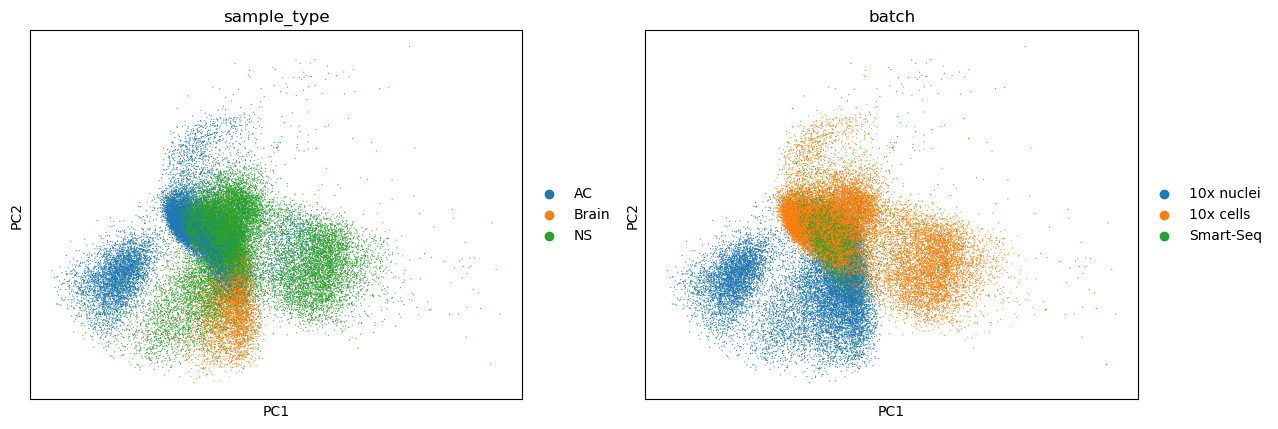

In [60]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color=['sample_type', 'batch'])

In [61]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

In [62]:
adata.obs['predicted_doublets'] = adata.obs['predicted_doublets'].astype(str)

In [63]:
adata.write('./cells_concat.h5ad')

---

In [14]:
adata = sc.read('./cells_concat.h5ad')

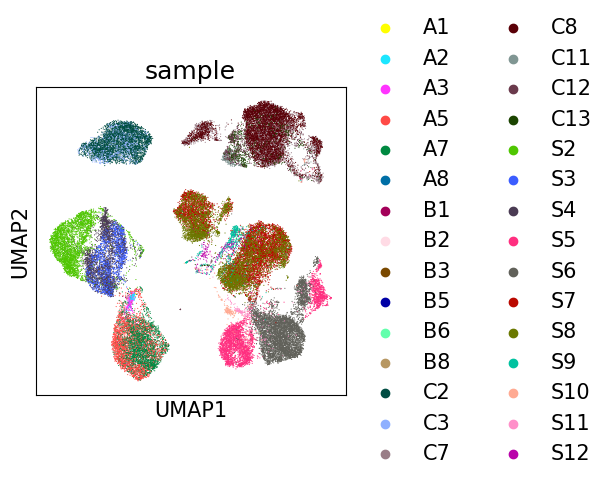

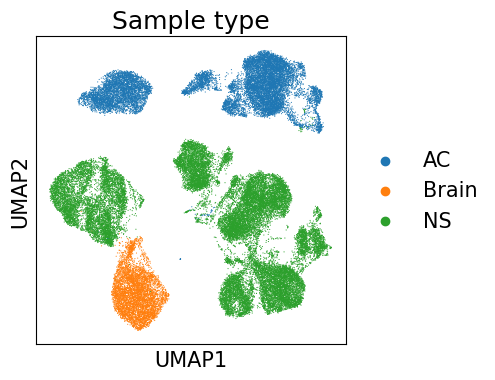

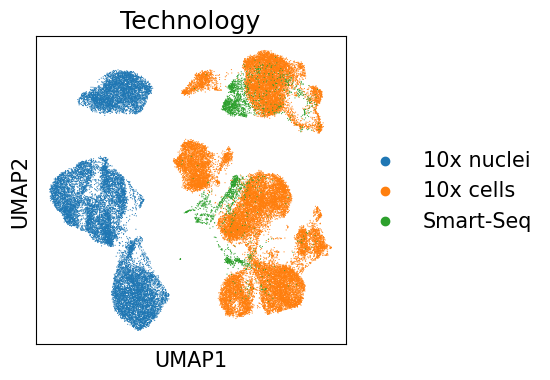

In [39]:
with rc_context({'font.size': 15.0,'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=['sample'])
    sc.pl.umap(adata, color=['sample_type'], title='Sample type')
    sc.pl.umap(adata, color=['batch'], title='Technology')

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


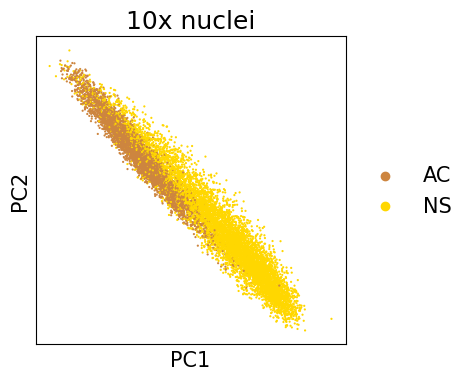

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


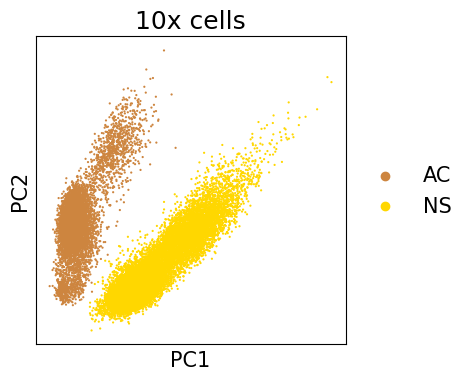

/home/laura.vicente/miniconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


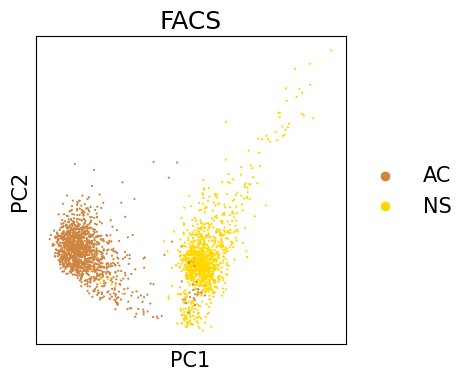

In [82]:

with rc_context({'font.size': 15.0,'figure.figsize': (4, 4)}):
    pca1 = sc.pl.pca(adata_3GEX, color='sample_type', wspace=0.5,  
                    size=10, title='10x nuclei', frameon=True, legend_loc='right margin',
                    legend_fontsize=15, legend_fontweight='medium', palette=['peru','gold']
)
    pca2 = sc.pl.pca(adata_5GEX, color='sample_type', wspace=0.5,  
                    size=10, title='10x cells', frameon=True, legend_loc='right margin',
                    legend_fontsize=15, legend_fontweight='medium', palette=['peru','gold']
)
    pca3 = sc.pl.pca(adata_SS2, color='sample_type', wspace=0.5,  
                    size=10, title='FACS', frameon=True, legend_loc='right margin',
                    legend_fontsize=15, legend_fontweight='medium', palette=['peru','gold']
)

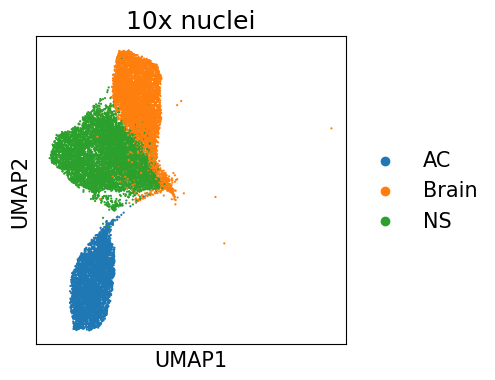

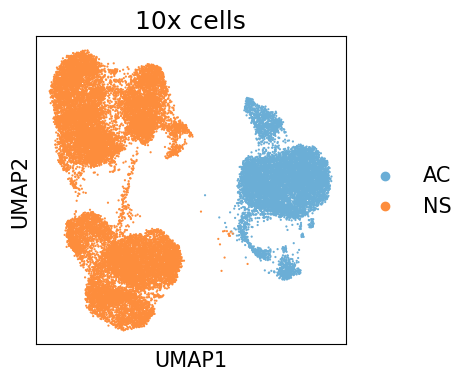

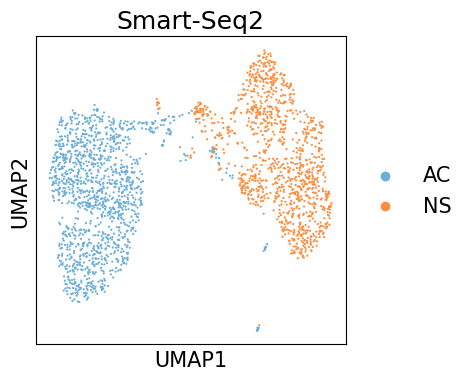

In [41]:
with rc_context({'font.size': 15.0,'figure.figsize': (4, 4)}):
    umap1 = sc.pl.umap(adata_3GEX, color='sample_type', wspace=0.5,  
                    size=10, title='10x nuclei', frameon=True, legend_loc='right margin',
                    legend_fontsize=15, legend_fontweight='medium')
    umap2 = sc.pl.umap(adata_5GEX, color='sample_type', wspace=0.5,  
                    size=10, title='10x cells', frameon=True, legend_loc='right margin',
                    legend_fontsize=15, legend_fontweight='medium')
    umap3 = sc.pl.umap(adata_SS2, color='sample_type', wspace=0.5,  
                    size=10, title='Smart-Seq2', frameon=True, legend_loc='right margin',
                    legend_fontsize=15, legend_fontweight='medium')

In [45]:
sc.tl.rank_genes_groups(adata_3GEX, groupby='sample_type', method='wilcoxon', key_added='rank_genes')

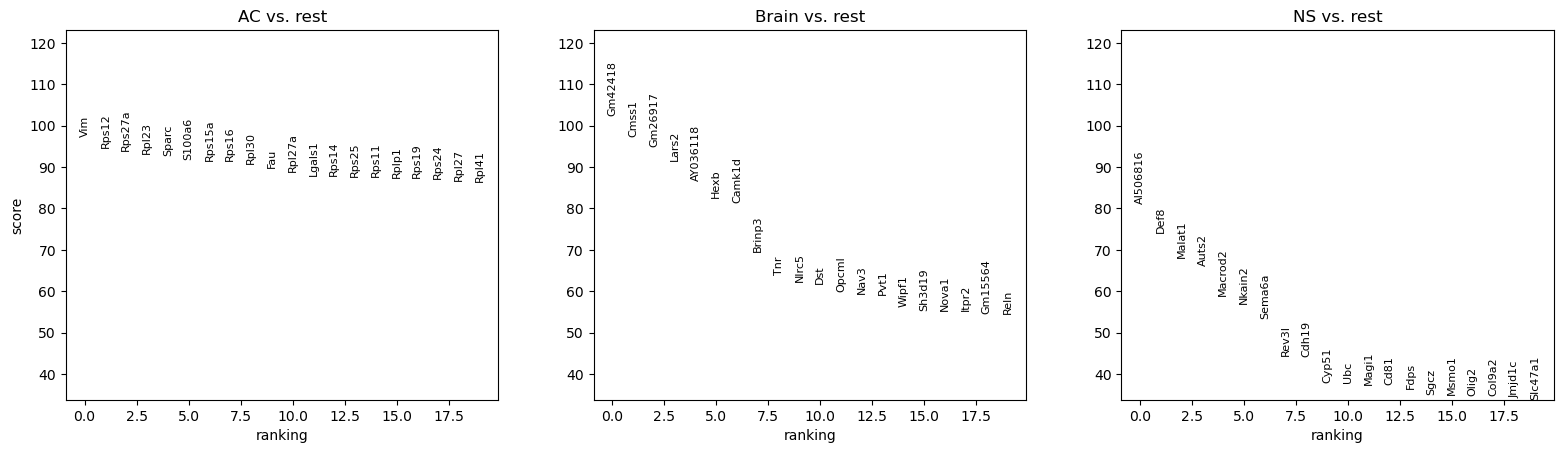

In [12]:
sc.pl.rank_genes_groups(adata_3GEX, key='rank_genes')

In [15]:
for i in set(adata_3GEX.obs['sample_type']):
    genes_to_plot=sc.get.rank_genes_groups_df(adata_3GEX, group=i, key='rank_genes', pval_cutoff=0.01, log2fc_min=0)['names'][:50].tolist()
    print(genes_to_plot)

['Gm42418', 'Cmss1', 'Gm26917', 'Lars2', 'AY036118', 'Hexb', 'Camk1d', 'Brinp3', 'Tnr', 'Nlrc5', 'Dst', 'Opcml', 'Nav3', 'Pvt1', 'Wipf1', 'Sh3d19', 'Nova1', 'Itpr2', 'Gm15564', 'Reln', 'Mir99ahg', 'Vps13b', 'Prune2', 'Stat1', 'B3galt1', 'Zbtb20', 'Gphn', 'Herc6', 'Grip1', 'Adgrl3', 'Pde4b', 'Lhfpl3', 'Mmp16', 'H2-K1', 'Ptprz1', 'Cpq', 'Dock10', 'Tafa2', 'Ncam2', 'Gm35019', 'Zeb2', 'Rnf213', 'Bcas1', 'Ptpn13', 'Sox6', 'Tmeff2', 'Adamts6', 'Cped1', 'Reps2', 'Qk']
['Vim', 'Rps12', 'Rps27a', 'Rpl23', 'Sparc', 'S100a6', 'Rps15a', 'Rps16', 'Rpl30', 'Fau', 'Rpl27a', 'Lgals1', 'Rps14', 'Rps25', 'Rps11', 'Rplp1', 'Rps19', 'Rps24', 'Rpl27', 'Rpl41', 'Rps15', 'Rpl32', 'Rpl37', 'Tm4sf1', 'Rps18', 'Anxa2', 'Ppia', 'Rps10', 'Rpl21', 'Dbi', 'Rps8', 'Rpl24', 'Rpl26', 'Nme2', 'Rpl19', 'S100a4', 'mt-Nd1', 'Rpl23a', 'Rplp2', 'mt-Co2', 'Gapdh', 'Rpl18', 'Cryab', 'Rpl28', 'Rps13', 'Rpl34', 'Actb', 'Rps23', 'Rpl17', 'Rps20']
['AI506816', 'Def8', 'Malat1', 'Auts2', 'Macrod2', 'Nkain2', 'Sema6a', 'Rev3l', 'Cd

In [6]:
sc.tl.dendrogram(adata_3GEX, groupby='sample_type')

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


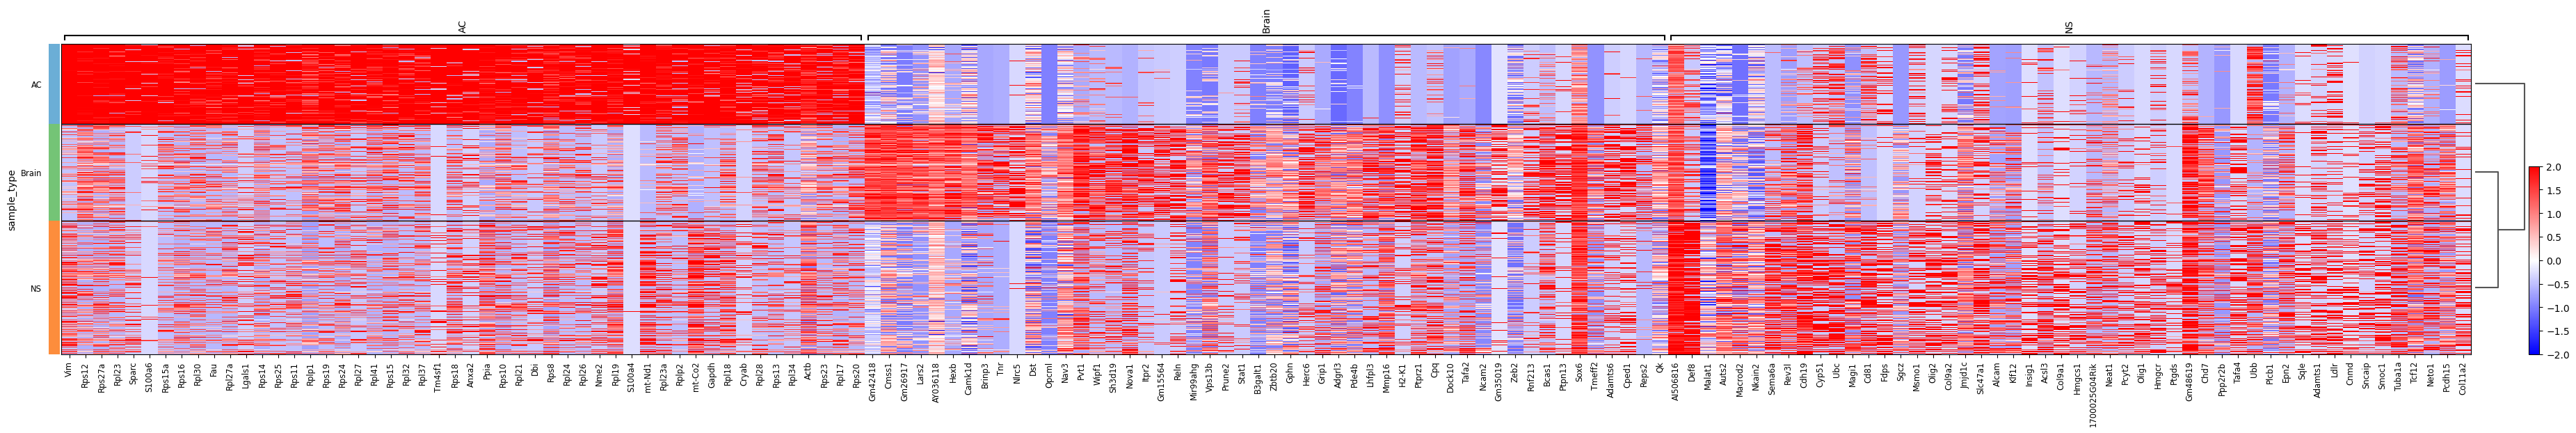

In [10]:
with rc_context({'font.size': 10,'figure.figsize': (20, 30)}):
    g = sc.pl.rank_genes_groups_heatmap(adata_3GEX, key='rank_genes', show_gene_labels=True,
                                n_genes=50, use_raw=False, vmin=-2, vmax=2, cmap='bwr', 
                                     dendrogram=True, swap_axes=False)


/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


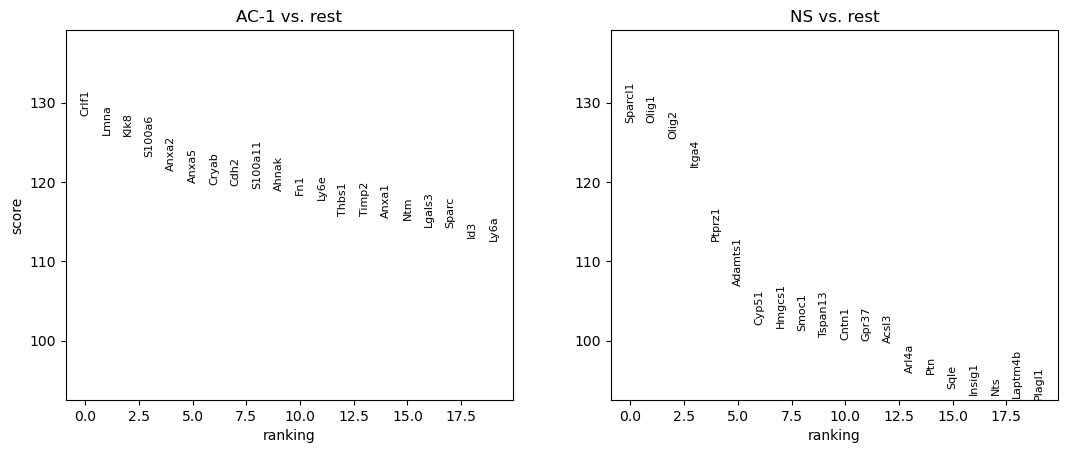

In [113]:
sc.tl.rank_genes_groups(adata_5GEX, groupby='sample_type', method='wilcoxon', key_added='rank_genes')
sc.pl.rank_genes_groups(adata_5GEX, key='rank_genes')

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


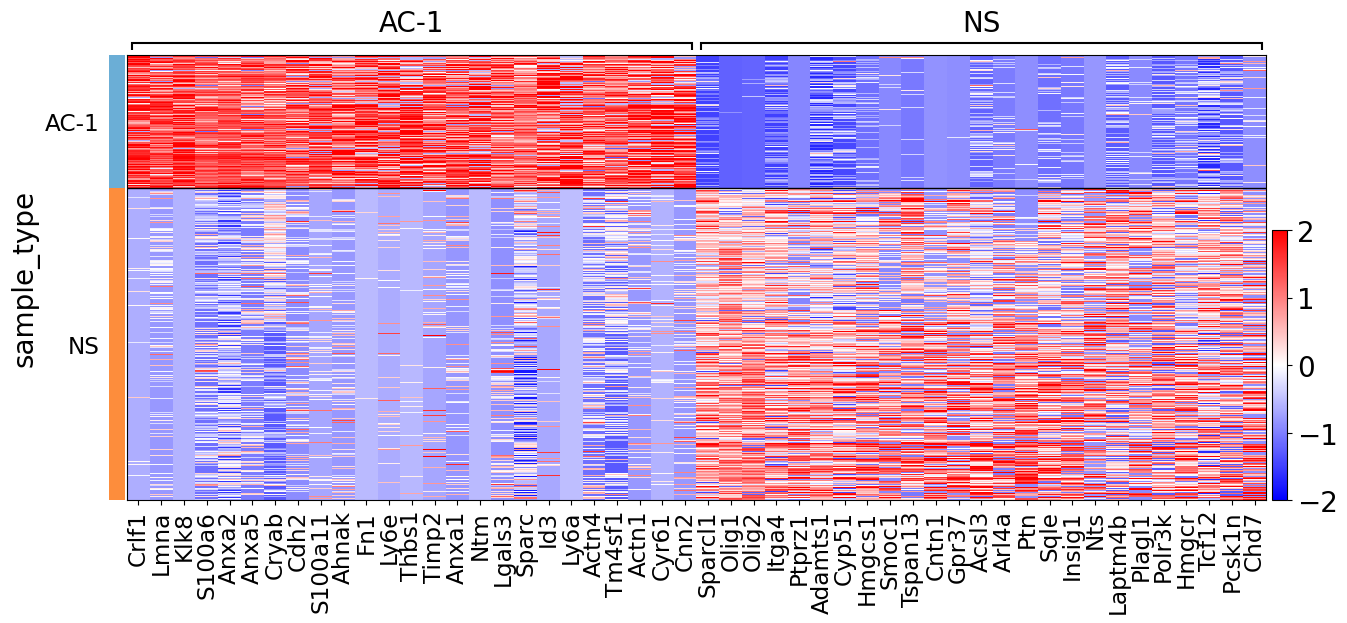

In [116]:
with rc_context({'font.size': 20,'figure.figsize': (10, 20)}):
    g = sc.pl.rank_genes_groups_heatmap(adata_5GEX, key='rank_genes', show_gene_labels=True,
                                n_genes=25, use_raw=False, vmin=-2, vmax=2, cmap='bwr', 
                                     dendrogram=False, swap_axes=False)

In [34]:
hypoxia = ['Pgk1','Car9','Vegfa','Spp1','Hif1a']
sc.tl.score_genes(adata, hypoxia, score_name='Darmanis_hyp')


/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


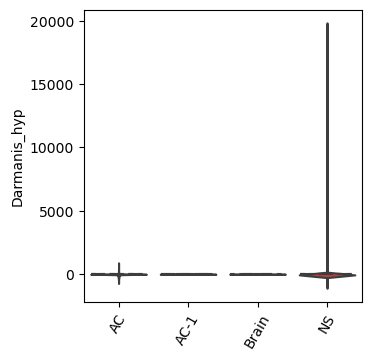

In [38]:
with rc_context({'font.size': 10.0,'figure.figsize': (4, 4)}):
    sc.pl.violin(adata, ['Darmanis_hyp'],
             stripplot=False, jitter=0.4, size=0.4, groupby = 'sample_type', rotation=60, inner='quartile',
                )

----

In [2]:
adata = sc.read('./cells_concat.h5ad')

In [64]:
adata.obs.phase.value_counts()

G1     21664
G2M    19379
S       7143
Name: phase, dtype: int64

In [120]:
total = pd.DataFrame(adata.obs['sample_type'].value_counts())
total = total.rename(columns={'sample_type':'total'})

AC = adata[adata.obs['sample_type']=='AC']
AC = pd.DataFrame(AC.obs['phase'].value_counts())
AC = AC.rename(columns={'phase':'AC'})
AC = AC.transpose()

NS = adata[adata.obs['sample_type']=='NS']
NS = pd.DataFrame(NS.obs['phase'].value_counts())
NS = NS.rename(columns={'phase':'NS'})
NS = NS.transpose()

brain = adata[adata.obs['sample_type']=='Brain']
brain = pd.DataFrame(brain.obs['phase'].value_counts())
brain = brain.rename(columns={'phase':'Brain'})
brain = brain.transpose()

df = pd.concat([brain,NS,AC])
df = pd.concat([df,total], axis=1) 

percent = pd.DataFrame(df.G1.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['G1 percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.G2M.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['G2M percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.S.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['S percent']
df = pd.concat([df,percent], axis=1)

In [121]:
percent = df[['G1 percent','S percent','G2M percent']]
percent = percent.rename(columns={'G1 percent':'G1','G2M percent':'G2M','S percent':'S'})
percent

,G1,S,G2M
Brain,24.1,35.7,40.1
NS,51.2,13.0,35.8
AC,40.6,10.4,49.0


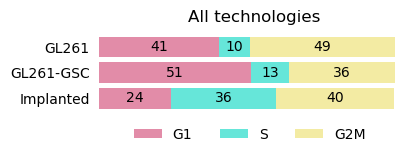

In [122]:
ax = percent.plot(kind='barh', stacked=True, figsize=(4, 1.1), width=0.8, alpha=0.8,
                 color = ['palevioletred','turquoise', 'khaki'], title='All technologies')

for c in ax.containers:
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left = False)
ax.get_xaxis().set_ticks([])
ax.set_ylabel('')
ax.set_yticklabels(['Implanted','GL261-GSC','GL261'])
ax.legend(bbox_to_anchor=(0.9, 0),frameon=False, ncol=3)

plt.show()

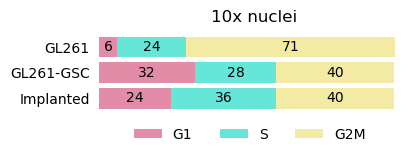

In [116]:
total = pd.DataFrame(adata_3GEX.obs['sample_type'].value_counts())
total = total.rename(columns={'sample_type':'total'})

AC = adata_3GEX[adata_3GEX.obs['sample_type']=='AC']
AC = pd.DataFrame(AC.obs['phase'].value_counts())
AC = AC.rename(columns={'phase':'AC'})
AC = AC.transpose()

NS = adata_3GEX[adata_3GEX.obs['sample_type']=='NS']
NS = pd.DataFrame(NS.obs['phase'].value_counts())
NS = NS.rename(columns={'phase':'NS'})
NS = NS.transpose()

brain = adata_3GEX[adata_3GEX.obs['sample_type']=='Brain']
brain = pd.DataFrame(brain.obs['phase'].value_counts())
brain = brain.rename(columns={'phase':'Brain'})
brain = brain.transpose()

df = pd.concat([brain,NS,AC])
df = pd.concat([df,total], axis=1) 

percent = pd.DataFrame(df.G1.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['G1 percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.G2M.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['G2M percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.S.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['S percent']
df = pd.concat([df,percent], axis=1)

percent = df[['G1 percent','S percent','G2M percent']]
percent = percent.rename(columns={'G1 percent':'G1','S percent':'S','G2M percent':'G2M'})

ax = percent.plot(kind='barh', stacked=True, figsize=(4, 1.1), width=0.8, alpha=0.8,
                 color = ['palevioletred','turquoise', 'khaki'], title='10x nuclei')

for c in ax.containers:
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left = False)
ax.get_xaxis().set_ticks([])
ax.set_ylabel('')
ax.set_yticklabels(['Implanted','GL261-GSC','GL261'])
ax.legend(bbox_to_anchor=(0.9, 0),frameon=False, ncol=3)

plt.show()

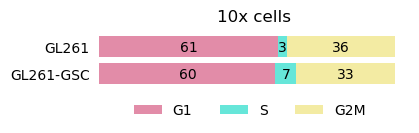

In [111]:
total = pd.DataFrame(adata_5GEX.obs['sample_type'].value_counts())
total = total.rename(columns={'sample_type':'total'})

AC = adata_5GEX[adata_5GEX.obs['sample_type']=='AC']
AC = pd.DataFrame(AC.obs['phase'].value_counts())
AC = AC.rename(columns={'phase':'AC'})
AC = AC.transpose()

NS = adata_5GEX[adata_5GEX.obs['sample_type']=='NS']
NS = pd.DataFrame(NS.obs['phase'].value_counts())
NS = NS.rename(columns={'phase':'NS'})
NS = NS.transpose()

df = pd.concat([NS,AC])
df = pd.concat([df,total], axis=1) 

percent = pd.DataFrame(df.G1.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['G1 percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.G2M.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['G2M percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.S.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['S percent']
df = pd.concat([df,percent], axis=1)

percent = df[['G1 percent','S percent','G2M percent']]
percent = percent.rename(columns={'G1 percent':'G1','G2M percent':'G2M','S percent':'S'})

ax = percent.plot(kind='barh', stacked=True, figsize=(4, 0.8), width=0.8, alpha=0.8,
                 color = ['palevioletred','turquoise', 'khaki'], title='10x cells')

for c in ax.containers:
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.set_ylabel('')
ax.tick_params(left = False)
ax.set_yticklabels(['GL261-GSC','GL261'])
ax.legend(bbox_to_anchor=(0.9, 0),frameon=False, ncol=3)

plt.show()

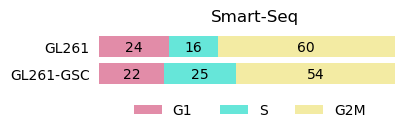

In [108]:
total = pd.DataFrame(adata_SS2.obs['sample_type'].value_counts())
total = total.rename(columns={'sample_type':'total'})

AC = adata_SS2[adata_SS2.obs['sample_type']=='AC']
AC = pd.DataFrame(AC.obs['phase'].value_counts())
AC = AC.rename(columns={'phase':'AC'})
AC = AC.transpose()

NS = adata_SS2[adata_SS2.obs['sample_type']=='NS']
NS = pd.DataFrame(NS.obs['phase'].value_counts())
NS = NS.rename(columns={'phase':'NS'})
NS = NS.transpose()

df = pd.concat([NS,AC])
df = pd.concat([df,total], axis=1) 

percent = pd.DataFrame(df.G1.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['G1 percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.G2M.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['G2M percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.S.div(df.total, axis=0).mul(100).round(1))
percent.columns = ['S percent']
df = pd.concat([df,percent], axis=1)

percent = df[['G1 percent','S percent','G2M percent']]
percent = percent.rename(columns={'G1 percent':'G1','G2M percent':'G2M','S percent':'S'})

ax = percent.plot(kind='barh', stacked=True, figsize=(4, 0.8), width=0.8, alpha=0.8, 
                  color = ['palevioletred','turquoise', 'khaki'], title='Smart-Seq')

for c in ax.containers:
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.set_ylabel('')
ax.tick_params(left = False)
ax.set_yticklabels(['GL261-GSC','GL261'])
ax.legend(bbox_to_anchor=(0.9, 0),frameon=False, ncol=3)

plt.show()

Compare the number of cycling cells captured by each technology.



Cycling cells = S + G2M

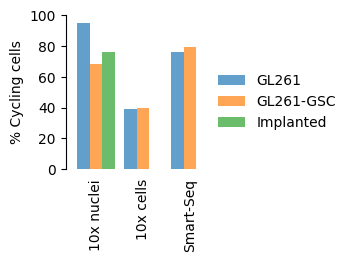

In [14]:
data = pd.DataFrame([[95, 68, 76],
[39, 40, 0],
[76, 79, 0]])

ax = data.plot(kind='bar', stacked=False, figsize=(2, 2), width=0.8, alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.set_ylim(0, 100)
ax.set_xticklabels(['10x nuclei','10x cells','Smart-Seq'], rotation=90)
ax.tick_params(bottom = False)
ax.set_ylabel('% Cycling cells')
ax.legend(bbox_to_anchor=(0.9, 0.7), loc='upper left', frameon=False, labels=['GL261','GL261-GSC','Implanted'])
plt.show()

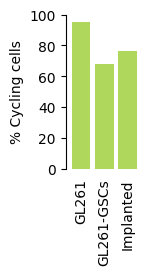

In [72]:
data = pd.DataFrame([95,68,76],index=['GL261','GL261-GSCs','Implanted'])

ax = data.plot(kind='bar', figsize=(1, 2), width=0.8,
              color=['yellowgreen'], alpha=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.set_ylim(0, 100)
ax.tick_params(bottom = False)
ax.set_ylabel('% Cycling cells')
ax.legend([],frameon=False)
plt.show()